##Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_csv('/content/drive/My Drive/Referensi TA/^JKSE(2).csv') #KINETIK
df = pd.read_csv('/content/drive/My Drive/Referensi TA/TLKM.JK.csv')  #IEEE
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3431.205078,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3405.341553,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3405.341553,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3405.341553,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3448.447266,44136900.0
...,...,...,...,...,...,...,...
768,2019-12-20,3900.0,4020.0,3900.0,4020.0,3641.612549,152132200.0
769,2019-12-23,4020.0,4030.0,3980.0,4020.0,3641.612549,58715700.0
770,2019-12-26,4020.0,4020.0,3980.0,4000.0,3623.494873,36935300.0
771,2019-12-27,3990.0,4010.0,3980.0,3990.0,3614.436279,52812000.0


In [ ]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [ ]:
df = df.dropna()
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
from scipy.signal import find_peaks
import plotly.graph_objects as go
df['Date']=pd.to_datetime(df['Date'])

fig = go.Figure(data = [go.Candlestick(x = df['Date'], 
                                       open = df['Open'], 
                                       high = df['High'], 
                                       low = df['Low'], 
                                       close = df['Close'])]
                                      )
fig.update_layout(xaxis_rangeslider_visible=False, template = "plotly_dark")
fig.update_layout(yaxis_title = "^JKSE_Price", xaxis_title = "Date")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from itertools import cycle
import plotly.express as px

fig = px.line(df, x=df['Date'], y=df['Close'],labels={'Date':'Date','Close':'Close Price'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='black', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

##Preprocessing Data

In [ ]:
real_data = df.copy()
del real_data['Date']
del real_data['Adj Close']
del real_data['Volume']
del real_data['Open']
del real_data['High']
del real_data['Low']

In [ ]:
real_data

,Close
0,3980.0
1,3950.0
2,3950.0
3,3950.0
4,4000.0
...,...
768,4020.0
769,4020.0
770,4000.0
771,3990.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
new_data = sc.fit_transform(real_data)

In [ ]:
new_data = pd.DataFrame(new_data)
new_data

,0
0,0.464052
1,0.444444
2,0.444444
3,0.444444
4,0.477124
...,...
767,0.490196
768,0.490196
769,0.477124
770,0.470588


In [ ]:
test_train = int(len(new_data)*0.7)
train = new_data[:test_train]
test = new_data[test_train:].reset_index(drop=True)
print(train.shape, test.shape)

(540, 1) (232, 1)


In [ ]:
from numpy import array
train = array(train)
test = array(test)

In [ ]:
train1 = [i for j in train for i in j]
test1 = [i for j in test for i in j]

In [ ]:
x_train=[]
x_train.clear()

for loop in range(0, len(train1)-2):
  x_train.append([ train1[loop], train1[loop+1], train1[loop+2]])

x_train = array(x_train)
x_train = x_train[:-1]
x_train

array([[0.46405229, 0.44444444, 0.44444444],
       [0.44444444, 0.44444444, 0.44444444],
       [0.44444444, 0.44444444, 0.47712418],
       ...,
       [0.33333333, 0.37254902, 0.38562092],
       [0.37254902, 0.38562092, 0.41176471],
       [0.38562092, 0.41176471, 0.39215686]])

In [ ]:
y_train = train[3:]
y_train[:5]

array([[0.44444444],
       [0.47712418],
       [0.49019608],
       [0.47712418],
       [0.45098039]])

In [ ]:
ytr = train1[-1]
ytr

0.33333333333333304

In [ ]:
test1[:5]

[0.33333333333333304,
 0.3856209150326797,
 0.3856209150326797,
 0.3790849673202614,
 0.43137254901960764]

In [ ]:
test1 = [ytr] + test1

In [ ]:
test1[:5]

[0.33333333333333304,
 0.33333333333333304,
 0.3856209150326797,
 0.3856209150326797,
 0.3790849673202614]

In [ ]:
x_test=[]
x_test.clear()

for loop in range(0, len(test1)-2):
  x_test.append([ test1[loop], test1[loop+1], test1[loop+2]])

x_test = array(x_test)
x_test = x_test[:-1]
x_test[:5]

array([[0.33333333, 0.33333333, 0.38562092],
       [0.33333333, 0.38562092, 0.38562092],
       [0.38562092, 0.38562092, 0.37908497],
       [0.38562092, 0.37908497, 0.43137255],
       [0.37908497, 0.43137255, 0.35947712]])

In [ ]:
y_test = test[2:]
y_test[:5]

array([[0.38562092],
       [0.37908497],
       [0.43137255],
       [0.35947712],
       [0.33986928]])

In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(537, 3) (230, 3)
(537, 1) (230, 1)


##MLR

In [ ]:
from sklearn.linear_model import LinearRegression 
#from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [ ]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [ ]:
ypred = mlr.predict(x_test)

In [ ]:
# max_min_data = array(real_data)
# max_data = max(max_min_data)
# min_data = min(max_min_data)
# prediksi = (ypred*(max_data-min_data))+min_data
# aktual_y = (y_test*(max_data-min_data))+min_data
# aktual_x = (x_test*(max_data-min_data))+min_data
# dff = pd.DataFrame({'Actual' : aktual_y.flatten(), 'Predicted' : prediksi.flatten()}) 
# dff.sort_index()

In [ ]:
dff = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : ypred.flatten()}) 
dff.sort_index()

,Actual,Predicted
0,0.385621,0.386675
1,0.379085,0.380104
2,0.431373,0.380305
3,0.359477,0.432694
4,0.339869,0.354386
...,...,...
225,0.490196,0.411827
226,0.490196,0.497402
227,0.477124,0.480067
228,0.470588,0.477146


In [ ]:
# from sklearn import metrics #KNN

# print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(aktual_y, prediksi)) 
# print('Mean Absolute Error:', metrics.mean_absolute_error(aktual_y, prediksi))  
# print('Mean Squared Error:', metrics.mean_squared_error(aktual_y, prediksi))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(aktual_y, prediksi)))

In [ ]:
from sklearn import metrics #IEEE

print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, ypred)/100) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

Mean Absolute Percentage Error: 0.0006396785317754978
Mean Absolute Error: 0.028746848372700973
Mean Squared Error: 0.0013812330496815275
Root Mean Squared Error: 0.037164943827234925


In [ ]:
# akurasi = mlr.score(aktual_x, aktual_y)
# print('Akurasi MLR : ',akurasi*100)

In [ ]:
akurasi = mlr.score(x_test,y_test)
print('Akurasi MLR : ',akurasi*100)

Akurasi MLR :  92.42749247219452


##Hasil Evaluasi

In [ ]:
ypred = pd.DataFrame(ypred)
y_test = pd.DataFrame(y_test)

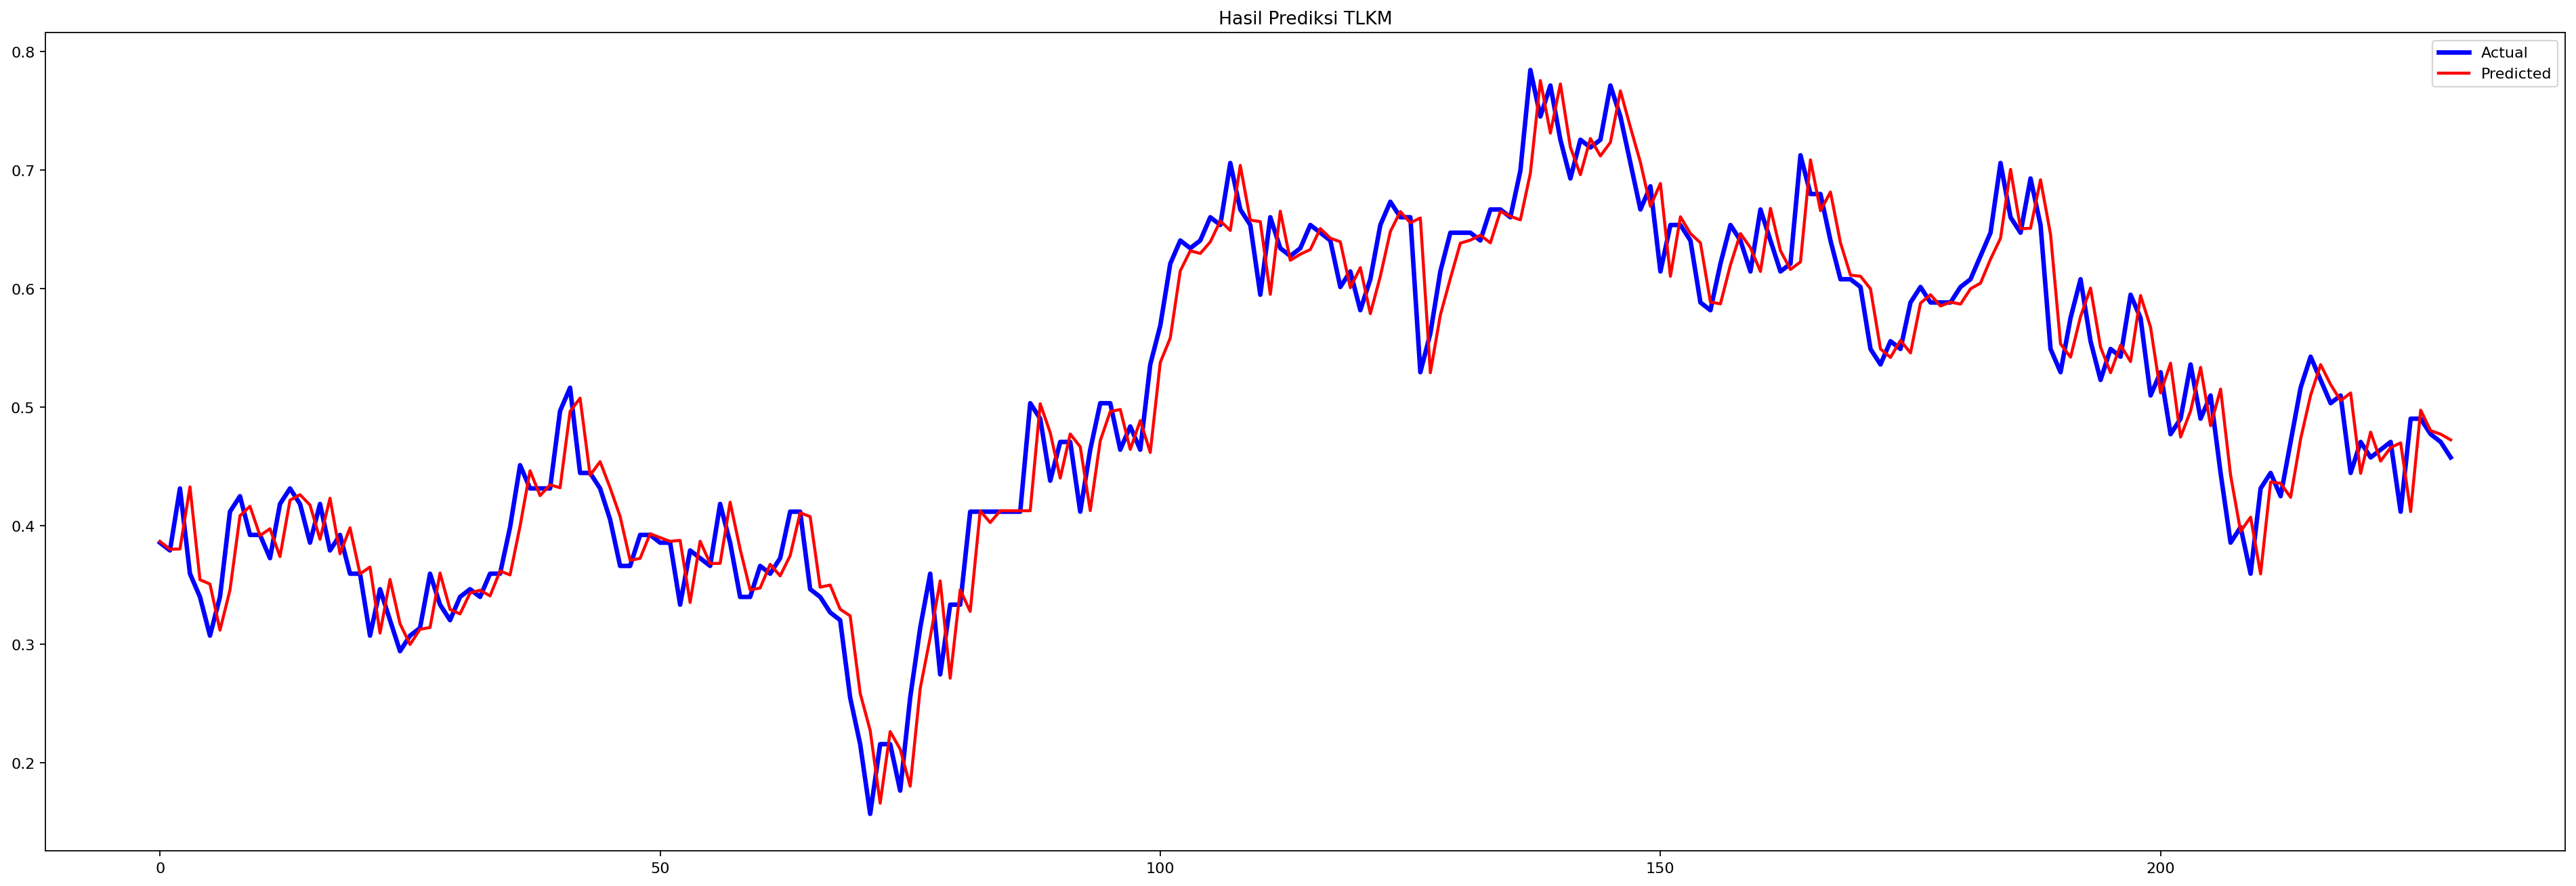

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 10), dpi=160, facecolor='w', edgecolor='k')
# plt.xlabel('X AXIS')
# plt.ylabel('Y AXIS')

plt.plot(y_test , color='blue', linewidth = 3, label = 'Actual')#, linestyle='dotted')
plt.plot(ypred , color='red', linewidth = 2, label = 'Predicted')#, linestyle='dotted')

plt.title("Hasil Prediksi TLKM")
plt.legend()

plt.show()

In [ ]:
real_data.describe()

,Close
count,772.000000
mean,4029.650259
std,331.693383
min,3270.000000
25%,3800.000000
50%,3990.000000
75%,4250.000000
max,4800.000000


In [ ]:
max_min_data = array(real_data)

In [ ]:
max_data = max(max_min_data)

In [ ]:
min_data = min(max_min_data)

In [ ]:
prediksi = (ypred*(max_data-min_data))+min_data
aktual = (y_test*(max_data-min_data))+min_data

In [ ]:
# aktual = round(aktual)
# aktual.head()

In [ ]:
prediksi = round(prediksi)
prediksi

,0
0,3862.0
1,3852.0
2,3852.0
3,3932.0
4,3812.0
...,...
225,3900.0
226,4031.0
227,4005.0
228,4000.0


In [ ]:
aktl = int(len(real_data)*0.7)
aktl_train = real_data[:aktl]
aktl_test = real_data[aktl:]
print(aktl_train.shape, aktl_test.shape)

(540, 1) (232, 1)


In [ ]:
aktual_train = round(aktl_train)
aktual_train.tail()

,Close
535,3840.0
536,3860.0
537,3900.0
538,3870.0
539,3780.0


In [ ]:
aktual = aktl_test[2:]
# aktual = round(aktual) 
aktual.head()

,Close
542,3860.0
543,3850.0
544,3930.0
545,3820.0
546,3790.0


In [ ]:
a = [0]*(len(train)+2)
b = array(a)
s = array(prediksi)
c = [x for y in s for x in y]
z = [a+c]

In [ ]:
yp = pd.DataFrame(z)
yp1 = yp.melt(value_name='Prediksi')
del yp1['variable']
yp1 = yp1.replace(0, '')

In [ ]:
yp1

,Prediksi
0,
1,
2,
3,
4,
...,...
767,3900
768,4031
769,4005
770,4000


In [ ]:
data_asli = real_data.reset_index(0)
del data_asli['index']
data_asli = round(data_asli)
data_asli

,Close
0,3980.0
1,3950.0
2,3950.0
3,3950.0
4,4000.0
...,...
767,4020.0
768,4020.0
769,4000.0
770,3990.0


In [ ]:
waktu = df['Date'].reset_index(0)
del waktu['index']
waktu = pd.DataFrame(waktu)
waktu

,Date
0,2017-01-02
1,2017-01-03
2,2017-01-04
3,2017-01-05
4,2017-01-06
...,...
767,2019-12-20
768,2019-12-23
769,2019-12-26
770,2019-12-27


In [ ]:
hasil = pd.concat([waktu,yp1], axis=1)

In [ ]:
gabung = pd.concat([waktu,data_asli], axis=1)

In [ ]:
fig = px.line(hasil, x='Date', y='Prediksi', labels={'Date':'Date','Close':'Predic Close'})
fig.add_scatter(x=gabung['Date'], y=gabung['Close'])
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='black', font_size=15, font_color='black')
fig.update_traces(marker_line_width=2, opacity=0.7)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

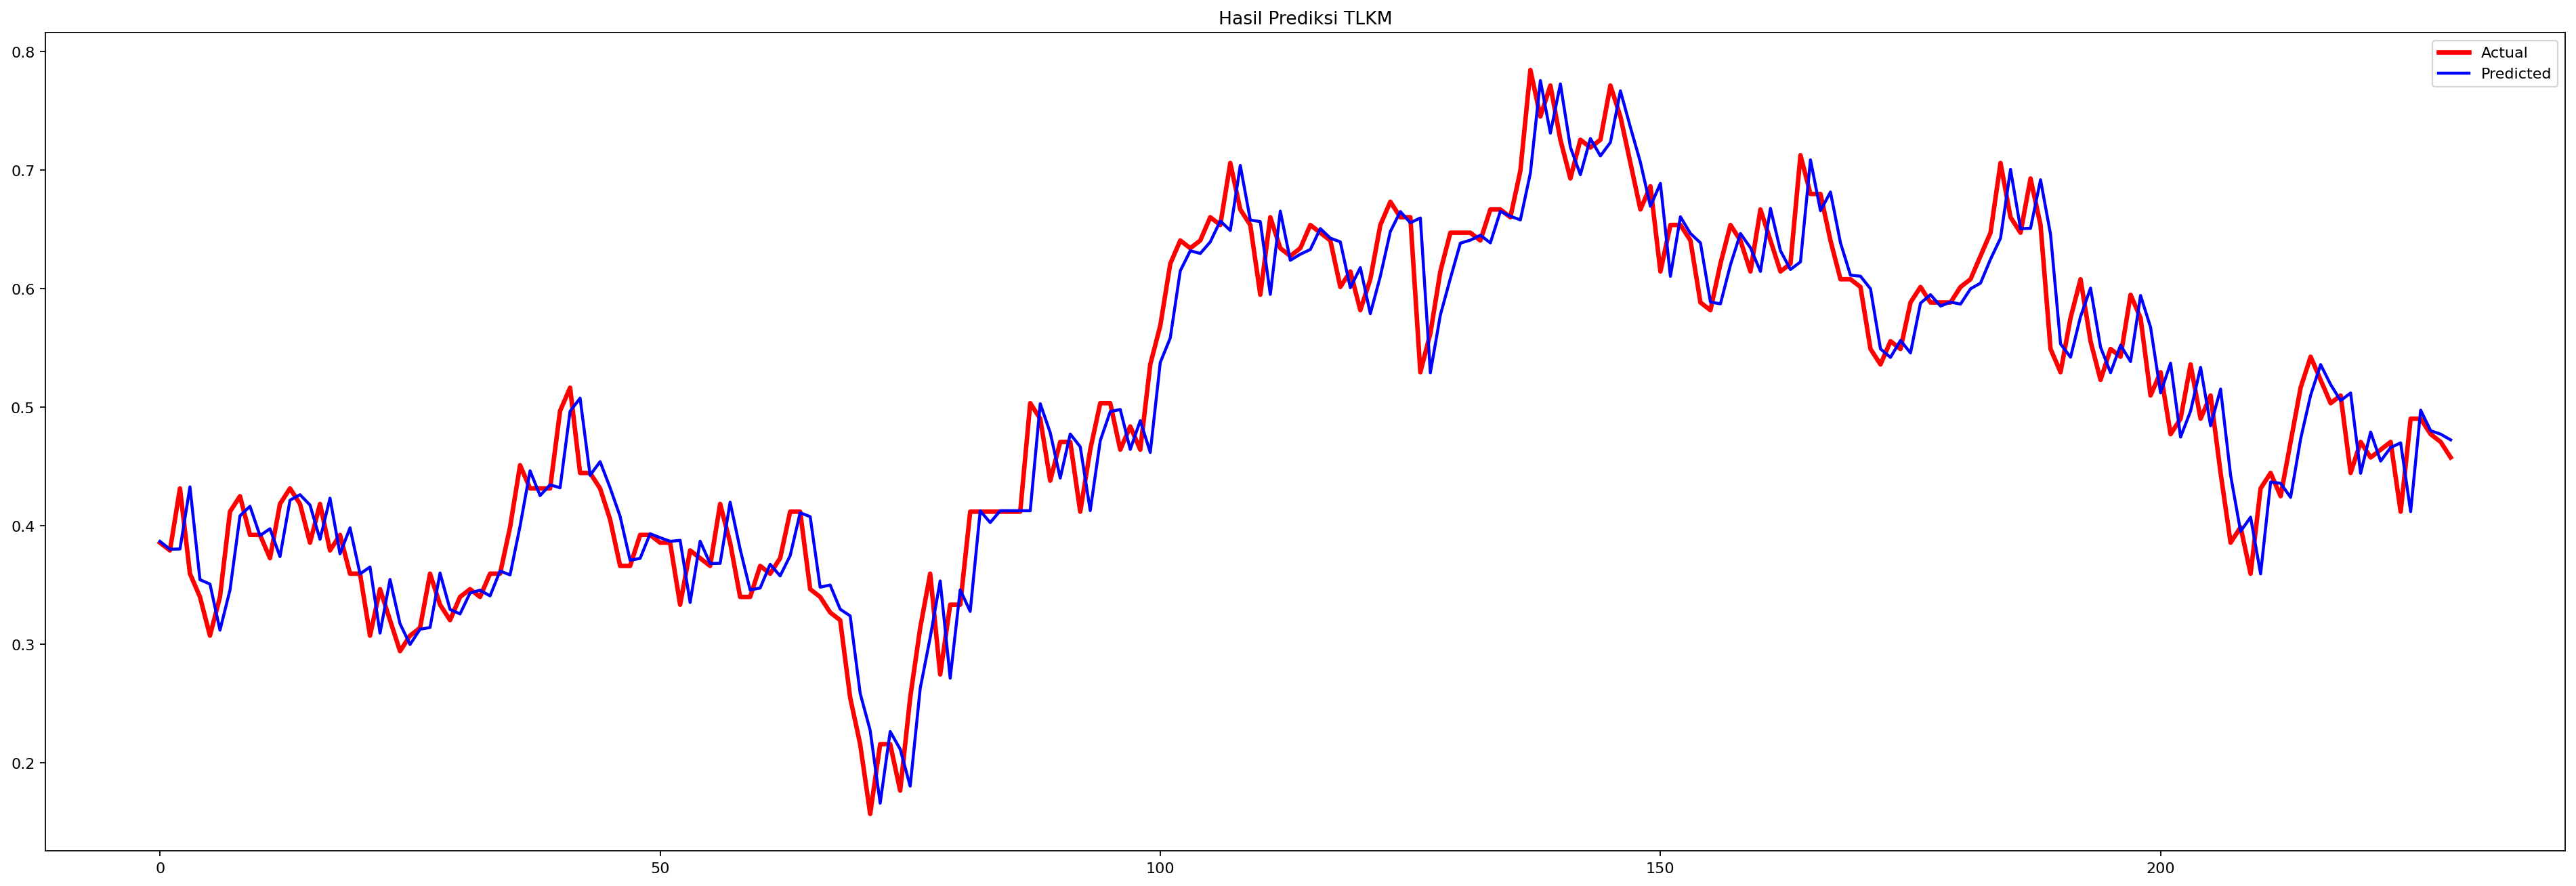

In [ ]:
figure(num=None, figsize=(30, 10), dpi=160, facecolor='w', edgecolor='k')
# plt.xlabel('X AXIS')
# plt.ylabel('Y AXIS')

plt.plot(y_test , color='red', linewidth = 3, label = 'Actual')#, linestyle='dotted')
plt.plot(ypred , color='blue', linewidth = 2, label = 'Predicted')#, linestyle='dotted')

plt.title("Hasil Prediksi TLKM")
plt.legend()

plt.show()